In [6]:
import torch as t
%matplotlib inline
from matplotlib import pyplot as plt
from IPython import display

t.manual_seed(1000)
def get_fake_data(batch_size=8):
    x=t.rand(batch_size,1)*20
    y=x*2+(1+t.randn(batch_size,1))*3
    return x,y

In [ ]:
x,y=get_fake_data()

In [14]:
x


  3.1577
 12.2072
 17.9951
 14.5924
 18.9647
 19.9044
 18.6500
 13.0991
[torch.FloatTensor of size 8x1]

In [8]:
y


 18.5392
 22.3163
 18.3613
 15.6808
  7.9078
 29.7957
 23.7576
 20.0180
[torch.FloatTensor of size 8x1]

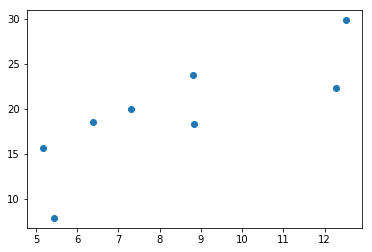

In [9]:
plt.scatter(x.squeeze().numpy(),y.squeeze().numpy())

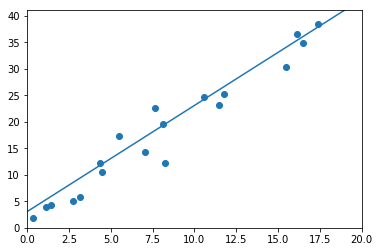

2.002969741821289 3.033106803894043


In [21]:
w=t.rand(1,1)
b=t.zeros(1,1)
lr=0.001

for ii in range(20000):          
    x,y=get_fake_data()
    #forward:
    y_pred=x.mm(w)+b.expand_as(y)
    loss=0.5*(y_pred-y)**2
    loss=loss.sum()
    
    dloss=1
    dy_pred=dloss*(y_pred-y)
    
    dw=x.t().mm(dy_pred)
    db=dy_pred.sum()
    
    w.sub_(lr*dw)
    b.sub_(lr*db)
    
    if ii%1000==0:
        display.clear_output(wait=True)
        x=t.arange(0,20).view(-1,1)
        y=x.mm(w)+b.expand_as(x)
        plt.plot(x.numpy(),y.numpy())#predicted
        
        x2,y2=get_fake_data(batch_size=20)
        plt.scatter(x2.numpy(),y2.numpy())#true data
        
        plt.xlim(0,20)
        plt.ylim(0,41)
        plt.show()
        plt.pause(0.5)
        print(w.squeeze()[0],b.squeeze()[0])